Streaming data dan data preprocessing Kelompok 5 PDB

12S18002 : Wiranda Siahaan

12S18009 : Novita Enjelia Hutapea

12S18041 : Merika H. Manurung

12S18046 : Tiara Octavia Situmorang

# Consume twitter steaming data

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import socket
import json
import numpy as np
import pandas as pd

In [4]:
#Kindly put your credentials received from twitter developer account
consumer_key='2mTmxHwkZramjVDOewE2dybgQ'
consumer_secret='dJ42E93prTAze5BoF4wAIcxYA6gXfu9rGrHr6gguUt85xcHJSi'
access_token ='1517128047019040768-YMZCcFIf6VLbZXNkJsa79sZk70xFkM'
access_secret='Auwa9WPIktjUCrgQmzceZsdMtMA2hbnebSR7QlmYEdrlq'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [6]:
for tweet in api.search(q='miniso', lan='en'):    
    print(tweet.text)

@PP_miniso จริงครับ ใครบอกเงินไม่สำคัญเถียงใจขาดเลย 5555
RT @lexhaul: wts lfb ph [help rt please, tysm!]
official exo lightstick ver. 1 (eribong) w/ miniso we bare bears panda
set: 1,500 (1,400 if…
@convomfs danish green, miniso
RT @1107amor: NOOOOO HONGJOONGS TIPTOES BY WOOYOUNG https://t.co/ZlLZrsIBCT
ถ้าเราเข้มแข็งพอ ทุกอย่างจะง่ายขึ้น👋🏻👋🏻👋🏻 ไม่จริง!!! ถ้าเรารวยต่างหาก ทุกอย่างจะง่ายขึ้น 🤣 เนาะ 555+… https://t.co/wYfmCmCF63
uppp https://t.co/lcXUiXUeU7
bump https://t.co/waqunEFwxa
bili na kayooo

wts lfb seventeen ph onhand https://t.co/C4I7MRhJFs
vump https://t.co/2Bbs9pOVvj
@ohmybeautybank Aku sekali jepit langsung naik.. sebelumnya pake miniso setengah harga mad tricky bgt hrs berkali2
mi novio me vió triste porque ando demasiado salada y me trajo flores y me llevo a miniso
kalo di rumah pake punya miniso yg violet musk 🥰
@sofia_gaba7 los de miniso se parecen y están en 150 peso
@TimpalBali Miniso kayanyaa
RT @kmjshng: cheolsoo facts and moments that keep me awake at night

;a th

In [7]:
tweetDf = pd.DataFrame(columns = ['User', 'User_statuses_count', 
                             'user_followers','fav_count','User_location','Tweets',])

In [8]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100000, lang='en').items():
        print(i, end='\r')
        tweetDf.loc[i, 'User'] = tweet.user.name
        tweetDf.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        tweetDf.loc[i, 'user_followers'] = tweet.user.followers_count
        tweetDf.loc[i, 'fav_count'] = tweet.favorite_count
        tweetDf.loc[i, 'User_location'] = tweet.user.location
        tweetDf.loc[i, 'Tweets'] = tweet.text
        
        
        tweetDf.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 200:
            break
        else:
            pass

In [9]:
stream(data = ['miniso'], file_name = 'miniso_2021')

In [10]:
tweetDf.head()

,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,ven ⛓️,1005,498,0,she / her (minor) ✿ ✿ ✿,"RT @lexhaul: wts lfb ph [help rt please, tysm!..."
1,zay,17674,1051,0,txt member 🐿️,"@convomfs danish green, miniso"
2,h3lluh,8265,239,0,/ svt / atz / nct / en- /,bump https://t.co/waqunEFwxa
3,h3lluh,8265,239,0,/ svt / atz / nct / en- /,RT @kmjshng: cheolsoo facts and moments that k...
4,🍰,1438,395,0,she/her • 20,"RT @lexhaul: wts lfb ph [help rt please, tysm!..."


## Data Preprocessing

In [11]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [12]:
dataset = pd.read_csv('miniso_2021.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [13]:
dataset.head()

,Unnamed: 0,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,0,ven ⛓️,1005,498,0,she / her (minor) ✿ ✿ ✿,"RT @lexhaul: wts lfb ph [help rt please, tysm!..."
1,1,zay,17674,1051,0,txt member 🐿️,"@convomfs danish green, miniso"
2,2,h3lluh,8265,239,0,/ svt / atz / nct / en- /,bump https://t.co/waqunEFwxa
3,3,h3lluh,8265,239,0,/ svt / atz / nct / en- /,RT @kmjshng: cheolsoo facts and moments that k...
4,4,🍰,1438,395,0,she/her • 20,"RT @lexhaul: wts lfb ph [help rt please, tysm!..."


In [14]:
print(dataset.shape)

(200, 7)


### missing value

In [15]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
dataset1 = dataset.dropna()
print(dataset1.shape)

(135, 7)


### remove duplicate

In [16]:
dataset2 = dataset1.drop_duplicates()
print(dataset2.shape)

(135, 7)


# Text Preprocessing



In [17]:
import re, string, unicodedata
import json
import nltk
import json
import time
import itertools  
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import tensorflow.keras.preprocessing.text as kpt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

## Case folding

In [18]:
# Change text column to lower lower case
dataset2['Tweets'] = dataset2['Tweets'].str.lower()

# Look at the change
print(dataset2)

     Unnamed: 0             User  User_statuses_count  user_followers  \
0             0           ven ⛓️                 1005             498   
1             1              zay                17674            1051   
2             2           h3lluh                 8265             239   
3             3           h3lluh                 8265             239   
4             4                🍰                 1438             395   
..          ...              ...                  ...             ...   
192         192               🥢🫕               112853             208   
193         193  juncutton day 🐰                40045             649   
194         194          eden !!                23610             762   
196         196          ᵃˡᵉˢⁱᵗᵃ                 7189             301   
199         199               ‏ً                13377             210   

     fav_count                                   User_location  \
0            0                       she / her  (minor) ✿

## Remove URL

In [19]:
def clean_data(dataset2):
#replace URL of a text
    dataset2['Tweets'] = dataset2['Tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

clean_data(dataset2)
print(dataset2['Tweets']);

0      rt @lexhaul: wts lfb ph [help rt please, tysm!...
1                         @convomfs danish green, miniso
2                                                 bump  
3      rt @kmjshng: cheolsoo facts and moments that k...
4      rt @lexhaul: wts lfb ph [help rt please, tysm!...
                             ...                        
192    rt @sugarsanriio: hello kitty cooler bag from ...
193    rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 xiumin...
194                    they have gay pins at miniso slay
196    rt @sugarsanriio: hello kitty cooler bag from ...
199    rt @sugarsanriio: hello kitty cooler bag from ...
Name: Tweets, Length: 135, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Number

In [20]:
# removing numbers from strings of speciafied 
# column, here 'Name'
dataset2['Tweets']= dataset2['Tweets'].str.replace('\d+', '')
  
# display output with numbers removed from 
# required strings
print(dataset2)

     Unnamed: 0             User  User_statuses_count  user_followers  \
0             0           ven ⛓️                 1005             498   
1             1              zay                17674            1051   
2             2           h3lluh                 8265             239   
3             3           h3lluh                 8265             239   
4             4                🍰                 1438             395   
..          ...              ...                  ...             ...   
192         192               🥢🫕               112853             208   
193         193  juncutton day 🐰                40045             649   
194         194          eden !!                23610             762   
196         196          ᵃˡᵉˢⁱᵗᵃ                 7189             301   
199         199               ‏ً                13377             210   

     fav_count                                   User_location  \
0            0                       she / her  (minor) ✿

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Punctuation

In [21]:
dataset2['Tweets'] = dataset2['Tweets'].str.replace(r'[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [22]:
print(dataset2)

     Unnamed: 0             User  User_statuses_count  user_followers  \
0             0           ven ⛓️                 1005             498   
1             1              zay                17674            1051   
2             2           h3lluh                 8265             239   
3             3           h3lluh                 8265             239   
4             4                🍰                 1438             395   
..          ...              ...                  ...             ...   
192         192               🥢🫕               112853             208   
193         193  juncutton day 🐰                40045             649   
194         194          eden !!                23610             762   
196         196          ᵃˡᵉˢⁱᵗᵃ                 7189             301   
199         199               ‏ً                13377             210   

     fav_count                                   User_location  \
0            0                       she / her  (minor) ✿

## Stopwords Removal

In [23]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [24]:
print(dataset2['Tweets']); 

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
 
dataset2['Tweets'] = dataset2['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(dataset2['Tweets'])

0      rt lexhaul wts lfb ph help rt please tysm\noff...
1                           convomfs danish green miniso
2                                                 bump  
3      rt kmjshng cheolsoo facts and moments that kee...
4      rt lexhaul wts lfb ph help rt please tysm\noff...
                             ...                        
192    rt sugarsanriio hello kitty cooler bag from mi...
193    rt kyvo_gvr wts  lfb help rt \n\n𓂋 xiumin exop...
194                    they have gay pins at miniso slay
196    rt sugarsanriio hello kitty cooler bag from mi...
199    rt sugarsanriio hello kitty cooler bag from mi...
Name: Tweets, Length: 135, dtype: object
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
0      rt lexhaul wts lfb ph help rt please tysm offi...
1                           convomfs danish green 

## Tokenizing

In [25]:
dataset2['Tweets'] = dataset2['Tweets'].apply(word_tokenize)

print(dataset2['Tweets'])

0      [rt, lexhaul, wts, lfb, ph, help, rt, please, ...
1                      [convomfs, danish, green, miniso]
2                                                 [bump]
3      [rt, kmjshng, cheolsoo, facts, moments, keep, ...
4      [rt, lexhaul, wts, lfb, ph, help, rt, please, ...
                             ...                        
192    [rt, sugarsanriio, hello, kitty, cooler, bag, ...
193    [rt, kyvo_gvr, wts, lfb, help, rt, 𓂋, xiumin, ...
194                            [gay, pins, miniso, slay]
196    [rt, sugarsanriio, hello, kitty, cooler, bag, ...
199    [rt, sugarsanriio, hello, kitty, cooler, bag, ...
Name: Tweets, Length: 135, dtype: object


In [26]:
print(dataset2)

     Unnamed: 0             User  User_statuses_count  user_followers  \
0             0           ven ⛓️                 1005             498   
1             1              zay                17674            1051   
2             2           h3lluh                 8265             239   
3             3           h3lluh                 8265             239   
4             4                🍰                 1438             395   
..          ...              ...                  ...             ...   
192         192               🥢🫕               112853             208   
193         193  juncutton day 🐰                40045             649   
194         194          eden !!                23610             762   
196         196          ᵃˡᵉˢⁱᵗᵃ                 7189             301   
199         199               ‏ً                13377             210   

     fav_count                                   User_location  \
0            0                       she / her  (minor) ✿

## Hasil Akhir

In [29]:
dataset2.to_csv('/content/gdrive/My Drive/PDB/preprocessing_PDB.csv', index = False)

## Label

In [32]:
preprocessing = pd.read_csv('preprocessing_PDB.csv')

In [33]:
print(preprocessing)

     Unnamed: 0             User  User_statuses_count  user_followers  \
0             0           ven ⛓️                 1005             498   
1             1              zay                17674            1051   
2             2           h3lluh                 8265             239   
3             3           h3lluh                 8265             239   
4             4                🍰                 1438             395   
..          ...              ...                  ...             ...   
130         192               🥢🫕               112853             208   
131         193  juncutton day 🐰                40045             649   
132         194          eden !!                23610             762   
133         196          ᵃˡᵉˢⁱᵗᵃ                 7189             301   
134         199               ‏ً                13377             210   

     fav_count                                   User_location  \
0            0                       she / her  (minor) ✿

In [34]:
print(preprocessing['Tweets'])

0      ['rt', 'lexhaul', 'wts', 'lfb', 'ph', 'help', ...
1              ['convomfs', 'danish', 'green', 'miniso']
2                                               ['bump']
3      ['rt', 'kmjshng', 'cheolsoo', 'facts', 'moment...
4      ['rt', 'lexhaul', 'wts', 'lfb', 'ph', 'help', ...
                             ...                        
130    ['rt', 'sugarsanriio', 'hello', 'kitty', 'cool...
131    ['rt', 'kyvo_gvr', 'wts', 'lfb', 'help', 'rt',...
132                    ['gay', 'pins', 'miniso', 'slay']
133    ['rt', 'sugarsanriio', 'hello', 'kitty', 'cool...
134    ['rt', 'sugarsanriio', 'hello', 'kitty', 'cool...
Name: Tweets, Length: 135, dtype: object


In [35]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score  < 0:
        return 'Negative'
    elif score == 0:
        return 'Netral'
    else:
        return 'Positive'

In [37]:
final_data = pd.DataFrame(preprocessing[['User', 'User_statuses_count', 
                             'user_followers','fav_count','User_location','Tweets']])
final_data.head()

,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,ven ⛓️,1005,498,0,she / her (minor) ✿ ✿ ✿,"['rt', 'lexhaul', 'wts', 'lfb', 'ph', 'help', ..."
1,zay,17674,1051,0,txt member 🐿️,"['convomfs', 'danish', 'green', 'miniso']"
2,h3lluh,8265,239,0,/ svt / atz / nct / en- /,['bump']
3,h3lluh,8265,239,0,/ svt / atz / nct / en- /,"['rt', 'kmjshng', 'cheolsoo', 'facts', 'moment..."
4,🍰,1438,395,0,she/her • 20,"['rt', 'lexhaul', 'wts', 'lfb', 'ph', 'help', ..."


In [39]:
final_data['Subjectivity'] = final_data['Tweets'].apply(getSubjectivity)
final_data['Polarity'] =  final_data['Tweets'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,User,User_statuses_count,user_followers,fav_count,User_location,Tweets,Subjectivity,Polarity,TextBlob
0,ven ⛓️,1005,498,0,she / her (minor) ✿ ✿ ✿,"['rt', 'lexhaul', 'wts', 'lfb', 'ph', 'help', ...",0.1,0.05,Positive
1,zay,17674,1051,0,txt member 🐿️,"['convomfs', 'danish', 'green', 'miniso']",0.3,-0.20,Negative
2,h3lluh,8265,239,0,/ svt / atz / nct / en- /,['bump'],0.0,0.00,Netral
3,h3lluh,8265,239,0,/ svt / atz / nct / en- /,"['rt', 'kmjshng', 'cheolsoo', 'facts', 'moment...",0.0,0.00,Netral
4,🍰,1438,395,0,she/her • 20,"['rt', 'lexhaul', 'wts', 'lfb', 'ph', 'help', ...",0.1,0.05,Positive


In [40]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Netral      70
Positive    56
Negative     9
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f67a6e3a390>,
 [Text(-0.06395927372182293, 1.0981389763162843, 'Netral'),
  Text(-0.1657544094214646, -1.0874398722491934, 'Positive'),
  Text(1.3204992185058648, -0.2806809824790417, 'Negative')],
 [Text(-0.03488687657553978, 0.5989848961725187, '51.9%'),
  Text(-0.0904114960480716, -0.5931490212268327, '41.5%'),
  Text(0.8314254338740631, -0.17672506304235958, '6.7%')])

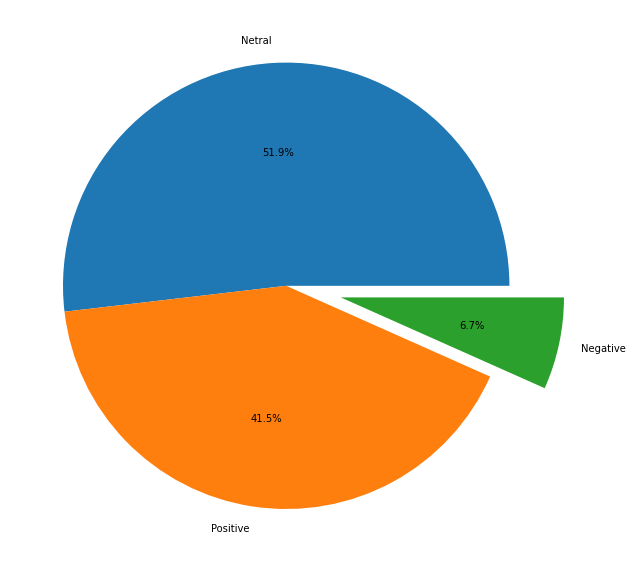

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,27))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [42]:
final_data.to_csv('/content/gdrive/My Drive/PDB/DataFinal_PDB.csv', index = False)